# Validation of Reduced GARCH Mean Return Behavior

## Purpose

This notebook validates that the **reduced GJR-GARCH(1,1) model** maintains proper statistical properties, specifically focusing on the **long-run mean return behavior** of simulated paths.

## What We're Testing

We are **visually inspecting for structural drift** in the long run mean return of paths. In a properly normalized GARCH model:

- **Expected behavior**: The mean return should remain close to zero over time
- **No structural drift**: There should be no systematic upward or downward trend in the cumulative mean
- **Stationarity**: The process should exhibit mean-reverting behavior around zero

## Model Details

The **reduced GJR-GARCH(1,1)** model is normalized such that:
- Mean return = 0 (no drift)
- Long-run variance = 1 (unit variance)
- Uses Hansen's skewed Student-t distribution for innovations

**Model equation:**
```
r'_t = ε'_t,    ε'_t = σ'_t z_t,   z_t ~ S_t_{ν,λ}(0,1)
(σ'_{t+1})^2 = ω' + (α + γ * I[ε'_t < 0]) * (ε'_t)^2 + β * (σ'_t)^2
```

Where:
- `ω' = 1 - κ` (normalized intercept)
- `κ = α + β + γ * P0` (persistence parameter)
- `P0 = E[z^2 | z < 0]` (left tail expectation)

## Validation Approach

1. **Large-scale simulation**: Run 1M scenarios over 1K timesteps
2. **Multiple runs**: Repeat 10 times to assess consistency
3. **Visual inspection**: Plot cumulative mean returns over time
4. **Statistical checks**: Verify mean remains near zero with acceptable variance

## Expected Results

✅ **Pass**: Mean return stays close to zero with random fluctuations  
❌ **Fail**: Systematic drift, trending behavior, or non-stationary patterns


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from density_engine.garch import GJRGARCHReduced_torch
from density_engine.skew_student_t import HansenSkewedT_torch

# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

run 0
run 1
run 2
run 3
run 4
run 5
run 6
run 7
run 8
run 9


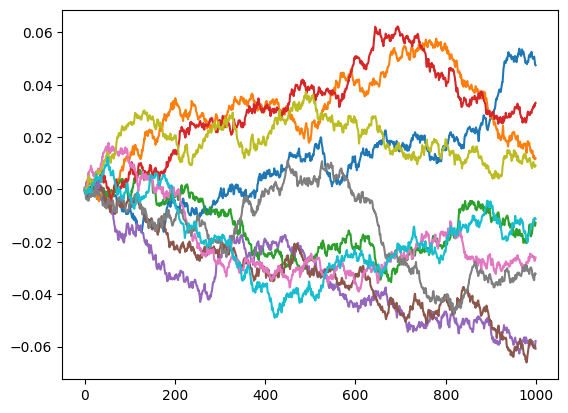

In [2]:

# Simulation parameters
num_scenarios = 1_000_000
num_timesteps = 1_000
num_runs = 10


# Reduced GARCH parameters
alpha = 0.1    # ARCH coefficient
gamma = 0.2     # GJR asymmetry coefficient
beta = 0.4     # GARCH coefficient
sigma0_sq = 0.4  # Initial variance

# Hansen's skewed t-distribution parameters
eta = 10.0        # Degrees of freedom
lam = -0.5       # Skewness parameter

# Create the distribution
dist = HansenSkewedT_torch(eta=eta, lam=lam)

# Create GARCH model
garch = GJRGARCHReduced_torch(
    alpha=alpha,
    gamma=gamma,
    beta=beta,
    sigma0_sq=sigma0_sq,
    dist=dist
)


for run in range(num_runs):
    print(f'run {run}')
    # Initialize the GARCH model
    garch.reset(num_scenarios)

    means = []
    for t in range(num_timesteps):
        cum_ret, _ = garch.step()
        mean_cum_ret = cum_ret.mean().cpu().float()
        means.append(mean_cum_ret)
    plt.plot(means)
plt.show()
